# Wind Turbine Analytics
Data Analytics and Classification Model for Failure Detection of Wind Turbine from IIoT Data

![](wtech-Adion.jpg)
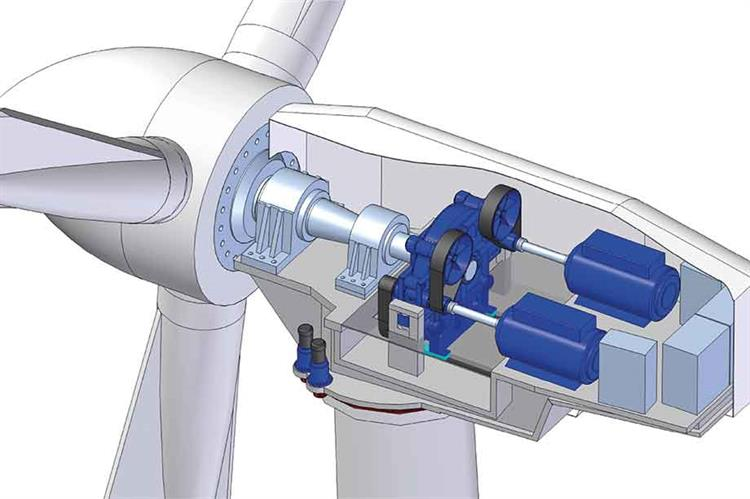

In [10]:
# Importing important Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder, LabelBinarizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#  for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc

# models
from sklearn import tree

# Data Retrieval

In [11]:
df = pd.read_csv('pred_maint_wind.csv')
df.head()

,DateTime,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
0,5/1/2014 0:00,1398920448,0,6.9,9.4,2.9,0.0,0.02,0.0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
1,5/1/2014 0:09,1398920960,0,5.3,8.9,1.6,0.0,0.01,0.0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2,5/1/2014 0:20,1398921600,0,5.0,9.5,1.4,0.0,0.04,0.0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
3,5/1/2014 0:30,1398922240,0,4.4,8.3,1.3,0.0,0.08,0.0,0,...,23,21,25,12,14,24,34,2501,25.272728,1.103713
4,5/1/2014 0:39,1398922752,0,5.7,9.7,1.2,0.0,0.05,0.0,0,...,23,21,25,12,14,23,34,2501,25.272728,1.103713


In [12]:
df.info

<bound method DataFrame.info of              DateTime        Time  Error  WEC: ava. windspeed  \
0       5/1/2014 0:00  1398920448      0                  6.9   
1       5/1/2014 0:09  1398920960      0                  5.3   
2       5/1/2014 0:20  1398921600      0                  5.0   
3       5/1/2014 0:30  1398922240      0                  4.4   
4       5/1/2014 0:39  1398922752      0                  5.7   
...               ...         ...    ...                  ...   
49022  4/8/2015 23:20  1428553216      0                  3.9   
49023  4/8/2015 23:30  1428553856      0                  3.9   
49024  4/8/2015 23:39  1428554368      0                  4.2   
49025  4/8/2015 23:50  1428555008      0                  4.1   
49026   4/9/2015 0:00  1428555648      0                  4.8   

       WEC: max. windspeed  WEC: min. windspeed  WEC: ava. Rotation  \
0                      9.4                  2.9                0.00   
1                      8.9                  1

In [13]:
df.shape

(49027, 66)

In [14]:
df.describe()

,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
count,4.902700e+04,49027.000000,49027.000000,49027.000000,49027.000000,49027.00000,49027.000000,49027.000000,49027.000000,49027.000000,...,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000
mean,1.413762e+09,0.938748,6.874626,9.340286,12.244133,8.67852,9.547354,8.515034,942.261244,1214.015400,...,30.335958,24.320211,28.802456,13.380219,23.116303,31.766537,43.992596,2988.628184,27.828410,1.855781
std,8.559693e+06,14.442141,3.694776,5.157448,223.186866,4.14345,4.482192,22.394531,1008.930159,1168.858993,...,5.623608,4.918045,5.185007,5.246230,6.360604,6.381892,10.404843,172.074485,5.595795,1.269928
min,1.398920e+09,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,-14.000000,0.000000
25%,1.406352e+09,0.000000,4.200000,5.800000,2.600000,6.33000,6.740000,5.880000,87.000000,138.000000,...,26.000000,20.000000,25.000000,9.000000,19.000000,27.000000,37.000000,3050.000000,24.363636,1.206045
50%,1.413706e+09,0.000000,6.500000,8.600000,4.400000,8.97000,10.060000,7.850000,536.000000,802.000000,...,30.000000,25.000000,29.000000,13.000000,24.000000,33.000000,43.000000,3050.000000,28.454546,1.566699
75%,1.421179e+09,0.000000,8.900000,11.700000,6.300000,11.92000,13.550000,10.390000,1551.000000,2326.000000,...,34.000000,28.000000,33.000000,17.000000,28.000000,36.000000,48.000000,3050.000000,31.818182,2.370270
max,1.428556e+09,246.000000,32.099998,51.099998,6553.500000,14.73000,18.910000,655.349976,3071.000000,3216.000000,...,49.000000,38.000000,44.000000,35.000000,36.000000,45.000000,71.000000,3050.000000,42.545456,23.512859


In [15]:
df.dtypes 

DateTime                  object
Time                       int64
Error                      int64
WEC: ava. windspeed      float64
WEC: max. windspeed      float64
                          ...   
Control cabinet temp.      int64
Transformer temp.          int64
RTU: ava. Setpoint 1       int64
Inverter averages        float64
Inverter std dev         float64
Length: 66, dtype: object

In [16]:
df.columns

Index(['DateTime', 'Time', 'Error', 'WEC: ava. windspeed',
       'WEC: max. windspeed', 'WEC: min. windspeed', 'WEC: ava. Rotation',
       'WEC: max. Rotation', 'WEC: min. Rotation', 'WEC: ava. Power',
       'WEC: max. Power', 'WEC: min. Power',
       'WEC: ava. Nacel position including cable twisting',
       'WEC: Operating Hours', 'WEC: Production kWh',
       'WEC: Production minutes', 'WEC: ava. reactive Power',
       'WEC: max. reactive Power', 'WEC: min. reactive Power',
       'WEC: ava. available P from wind',
       'WEC: ava. available P technical reasons',
       'WEC: ava. Available P force majeure reasons',
       'WEC: ava. Available P force external reasons',
       'WEC: ava. blade angle A', 'Sys 1 inverter 1 cabinet temp.',
       'Sys 1 inverter 2 cabinet temp.', 'Sys 1 inverter 3 cabinet temp.',
       'Sys 1 inverter 4 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.',
       'Sys 1 inverter 6 cabinet temp.', 'Sys 1 inverter 7 cabinet temp.',
       'Sys 2 inve


 -  Based on unique values, 'Error' is the best target feature for classification with 12 unique categories, 
 ideal for distinguishing different error types in a predictive maintenance context. 
 - 'Operating Hours' and 'Production kWh' have thousands of unique values, making them more suitable 
 for regression rather than classification.
 - 'Production Minutes' and 'ava. Power' could theoretically be classified, but may lose detail and are less informative than 'Error' for this task.


In [17]:
# Convert DateTime column to a datetime object if not already
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Exploring and Cleaning

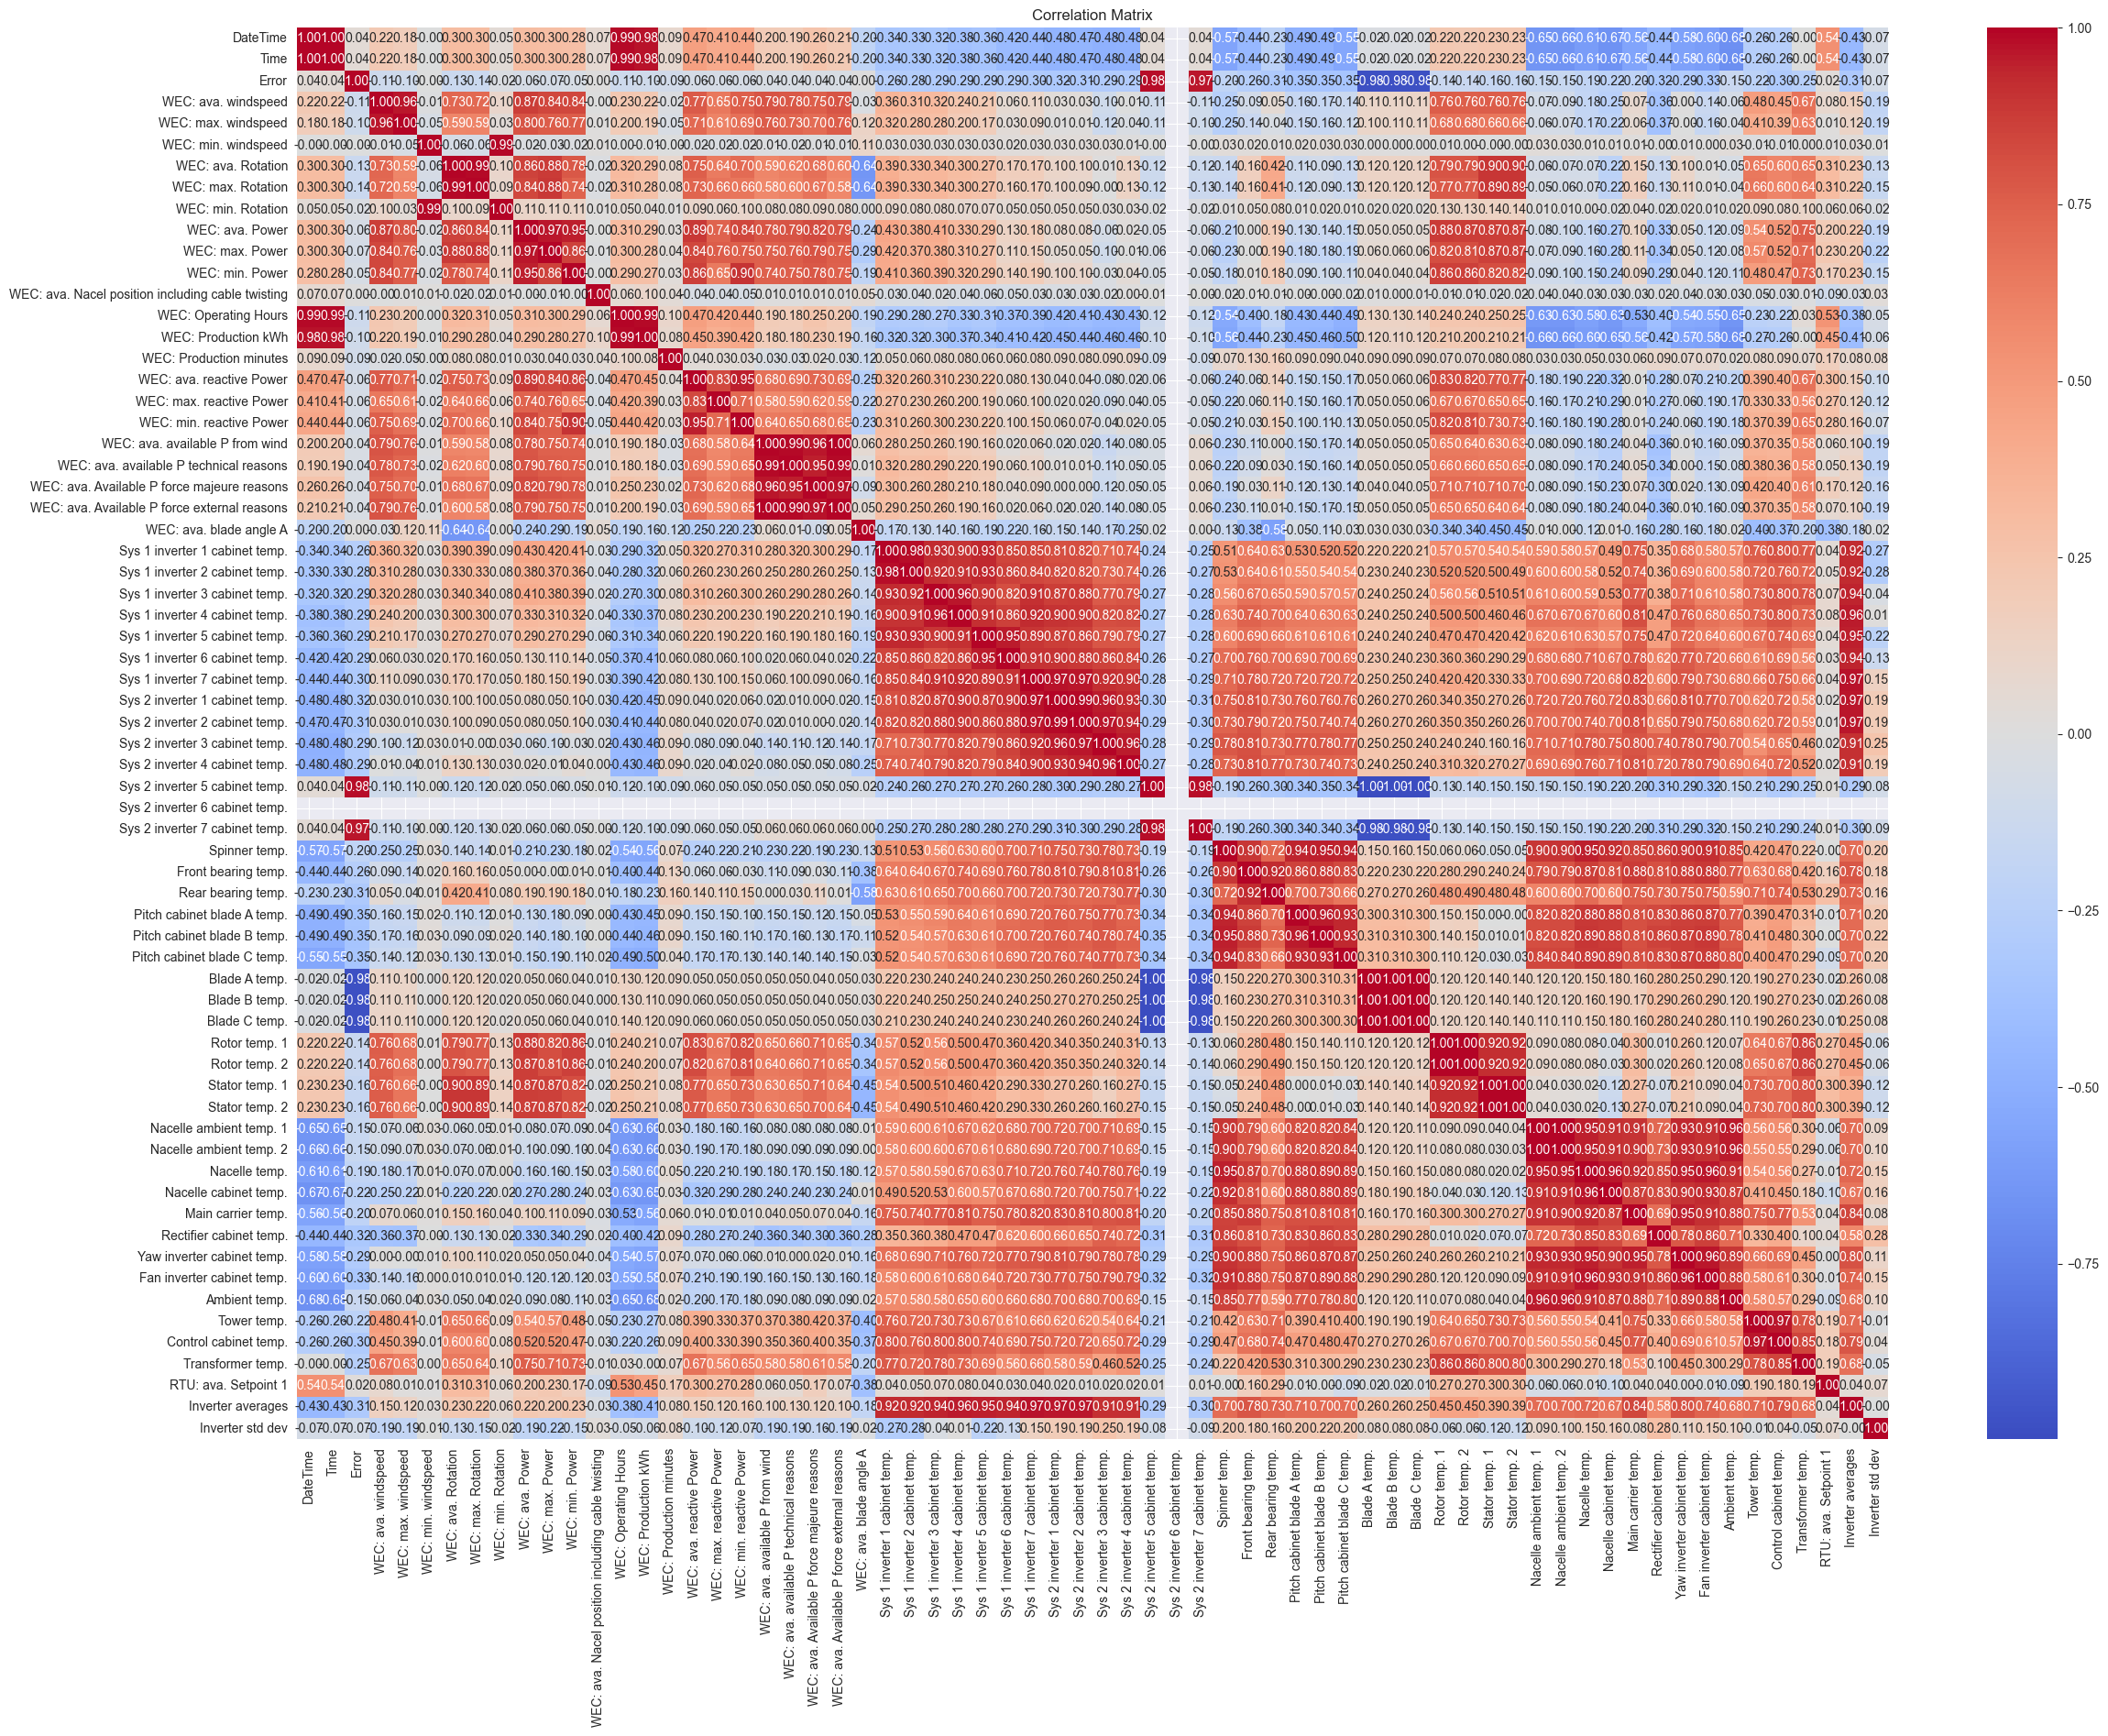

In [35]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(28, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Print correlation values in a readable format
print("Feature Correlation Values:")
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if col != row:  # Avoid self-correlation
            print(f"Correlation between {col} and {row}: {correlation_matrix.loc[row, col]:.2f}")

Feature Correlation Values:
Correlation between DateTime and Time: 1.00
Correlation between DateTime and Error: 0.04
Correlation between DateTime and WEC: ava. windspeed: 0.22
Correlation between DateTime and WEC: max. windspeed: 0.18
Correlation between DateTime and WEC: min. windspeed: -0.00
Correlation between DateTime and WEC: ava. Rotation: 0.30
Correlation between DateTime and WEC: max. Rotation: 0.30
Correlation between DateTime and WEC: min. Rotation: 0.05
Correlation between DateTime and WEC: ava. Power: 0.30
Correlation between DateTime and WEC: max. Power: 0.30
Correlation between DateTime and WEC: min. Power: 0.28
Correlation between DateTime and WEC: ava. Nacel position including cable twisting: 0.07
Correlation between DateTime and WEC: Operating Hours: 0.99
Correlation between DateTime and WEC: Production kWh: 0.98
Correlation between DateTime and WEC: Production minutes: 0.09
Correlation between DateTime and WEC: ava. reactive Power: 0.47
Correlation between DateTime an

In [51]:
# Filter correlations based on thresholds
threshold_lower = -1  # Lower threshold
threshold_upper = 0.85  # Upper threshold

# Extract pairs that meet the criteria
strong_correlations = correlation_df[
    (correlation_df['Absolute Correlation'] >= threshold_lower) & 
    (correlation_df['Absolute Correlation'] <= threshold_upper)
]

print("Filtered Correlations:")
print(strong_correlations)

Filtered Correlations:
                        Feature 1                    Feature 2  Correlation  \
354         Control cabinet temp.            Transformer temp.     0.846344   
355             Transformer temp.        Control cabinet temp.     0.846344   
356   Pitch cabinet blade C temp.      Nacelle ambient temp. 2     0.844437   
357       Nacelle ambient temp. 2  Pitch cabinet blade C temp.     0.844437   
358               WEC: min. Power          WEC: ava. windspeed     0.843302   
...                           ...                          ...          ...   
4155          WEC: min. windspeed                     DateTime    -0.000101   
4156              WEC: max. Power          Front bearing temp.    -0.000014   
4157          Front bearing temp.              WEC: max. Power    -0.000014   
4158          WEC: Production kWh            Transformer temp.    -0.000013   
4159            Transformer temp.          WEC: Production kWh    -0.000013   

      Absolute Correlation  

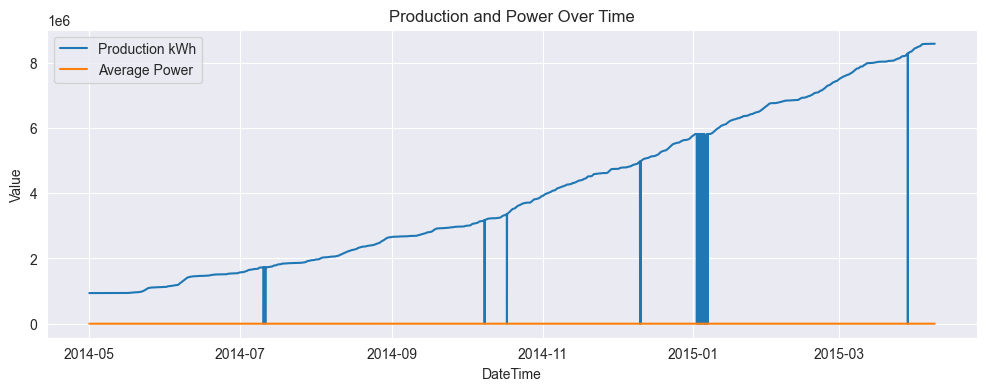

In [30]:
# Plotting production and power over time
plt.figure(figsize=(12, 4))
plt.plot(df['DateTime'], df['WEC: Production kWh'], label='Production kWh')
plt.plot(df['DateTime'], df['WEC: ava. Power'], label='Average Power')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.title('Production and Power Over Time')
plt.legend()
plt.show()

- The average power (`WEC: ava. Power`) remains constant because wind turbines operate within a fixed capacity range, determined by design and average wind conditions.
- Production (`WEC: Production kWh`) increases over time due to longer operational periods, reduced downtime(in total 6 instances), or improved turbine utilization, even when average power output stays stable.


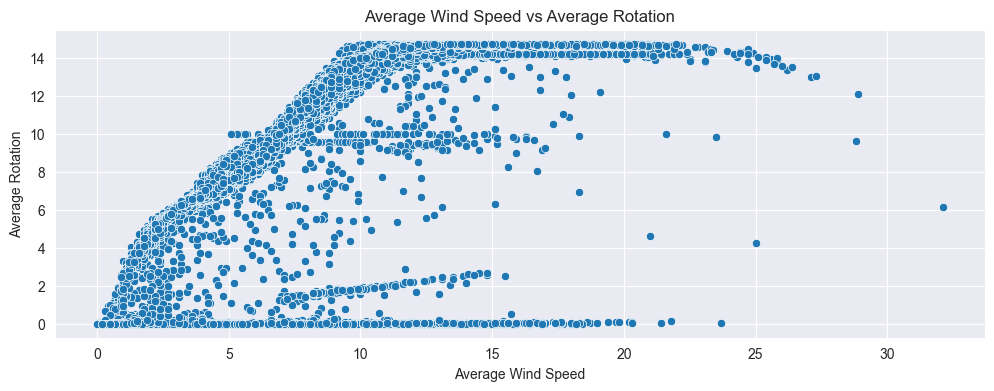

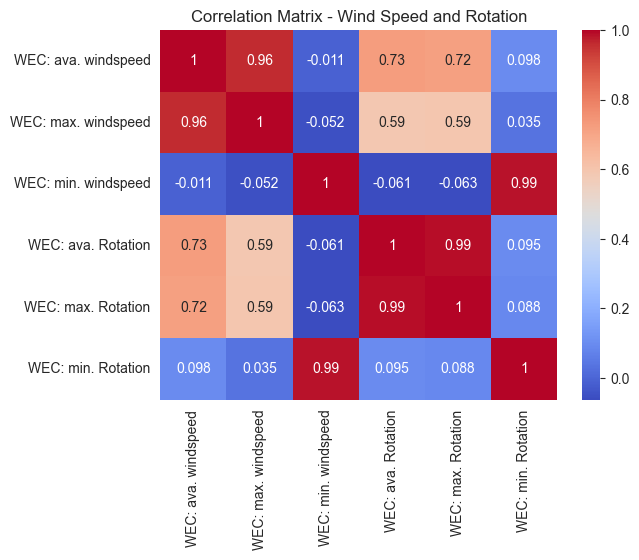

In [20]:
# Scatter plot for average wind speed and average rotation
plt.figure(figsize=(12, 4))
sns.scatterplot(data=df, x='WEC: ava. windspeed', y='WEC: ava. Rotation')
plt.title('Average Wind Speed vs Average Rotation')
plt.xlabel('Average Wind Speed')
plt.ylabel('Average Rotation')
plt.show()

# Correlation matrix for wind and rotation features
wind_rotation_cols = ['WEC: ava. windspeed', 'WEC: max. windspeed', 'WEC: min. windspeed',
                      'WEC: ava. Rotation', 'WEC: max. Rotation', 'WEC: min. Rotation']
sns.heatmap(df[wind_rotation_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Wind Speed and Rotation')
plt.show()

- The turbine's rotation reaches its maximum at approximately **14.7**, likely due to design constraints and safety measures.
- Wind speed above **8.9** contributes less to rotation increases, with speeds beyond **8.9** having no further impact. In some cases, with wind speed over **23**, it leads to a decrease in rotations.  
  *(Correlation of **0.73** in the Correlation Matrix between `WEC: ava. windspeed` vs `WEC: ava. Rotation` strengthens our claim.)*
- This plateau indicates effective turbine control to optimize performance while preventing mechanical damage at high wind speeds.


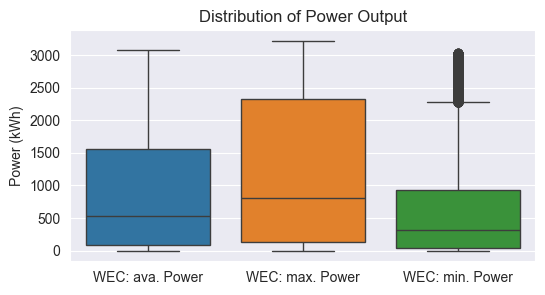

In [21]:
# creating a dataset for all power related cols
power_cols = ['WEC: ava. Power', 'WEC: max. Power', 'WEC: min. Power']

# Box plot to visualize the distribution of power output metrics
plt.figure(figsize=(6, 3))
sns.boxplot(data=df[power_cols])
plt.title('Distribution of Power Output')
plt.ylabel('Power (kWh)')
plt.show()

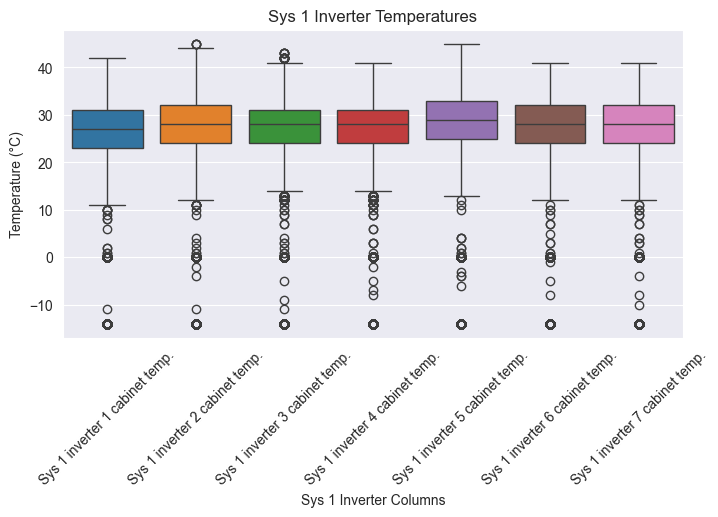

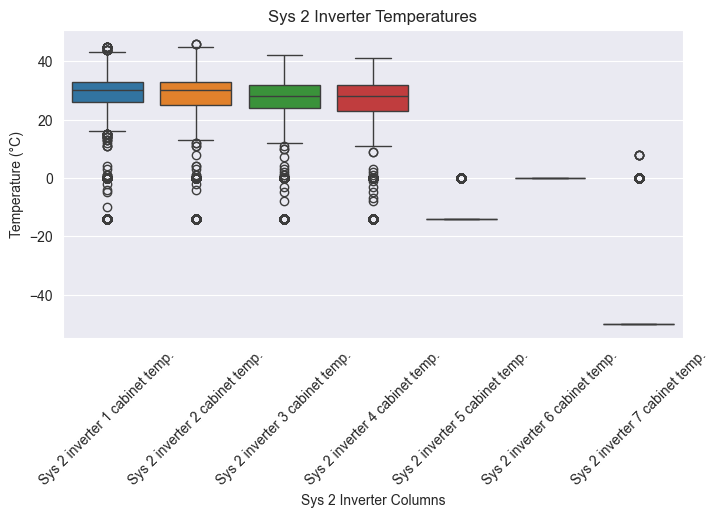

In [22]:
# Plotting inverter temperatures together
sys1_inverter_temps = ['Sys 1 inverter 1 cabinet temp.', 'Sys 1 inverter 2 cabinet temp.',
                  'Sys 1 inverter 3 cabinet temp.', 'Sys 1 inverter 4 cabinet temp.',
                  'Sys 1 inverter 5 cabinet temp.', 'Sys 1 inverter 6 cabinet temp.',
                  'Sys 1 inverter 7 cabinet temp.']
sys2_inverter_temps = ['Sys 2 inverter 1 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.',
       'Sys 2 inverter 3 cabinet temp.', 'Sys 2 inverter 4 cabinet temp.',
       'Sys 2 inverter 5 cabinet temp.', 'Sys 2 inverter 6 cabinet temp.',
       'Sys 2 inverter 7 cabinet temp.']

# Plotting Sys 1 Inverter Temperatures
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[sys1_inverter_temps])
plt.xticks(rotation=45)
plt.title('Sys 1 Inverter Temperatures')
plt.ylabel('Temperature (°C)')
plt.xlabel('Sys 1 Inverter Columns')
plt.show()

# Plotting Sys 2 Inverter Temperatures
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[sys2_inverter_temps])
plt.xticks(rotation=45)
plt.title('Sys 2 Inverter Temperatures')
plt.ylabel('Temperature (°C)')
plt.xlabel('Sys 2 Inverter Columns')
plt.show()

These boxplots show that `Sys 1` inverter temperatures are consistent and realistic, with mean values around **27°C to 28°C**, standard deviations of **~5.7°C to 6.3°C**, and maximum temperatures up to **45°C**, indicating normal operation. 

In contrast, `Sys 2` displays anomalies, including extreme negative mean values (e.g., **-13.95°C**, **-49.83°C**) and minimum values of **-50°C**, likely due to faulty sensors or inactive inverters. 

These irregularities in `Sys 2` require further investigation to ensure data reliability before analysis.


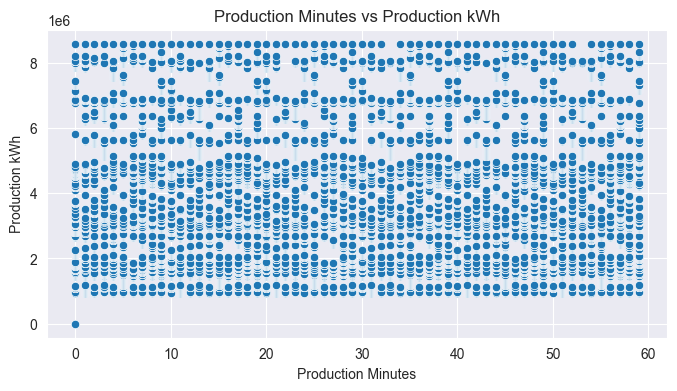

In [23]:
# Scatter plot of Production minutes vs Production kWh
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='WEC: Production minutes', y='WEC: Production kWh')
plt.title('Production Minutes vs Production kWh')
plt.xlabel('Production Minutes')
plt.ylabel('Production kWh')
plt.show()

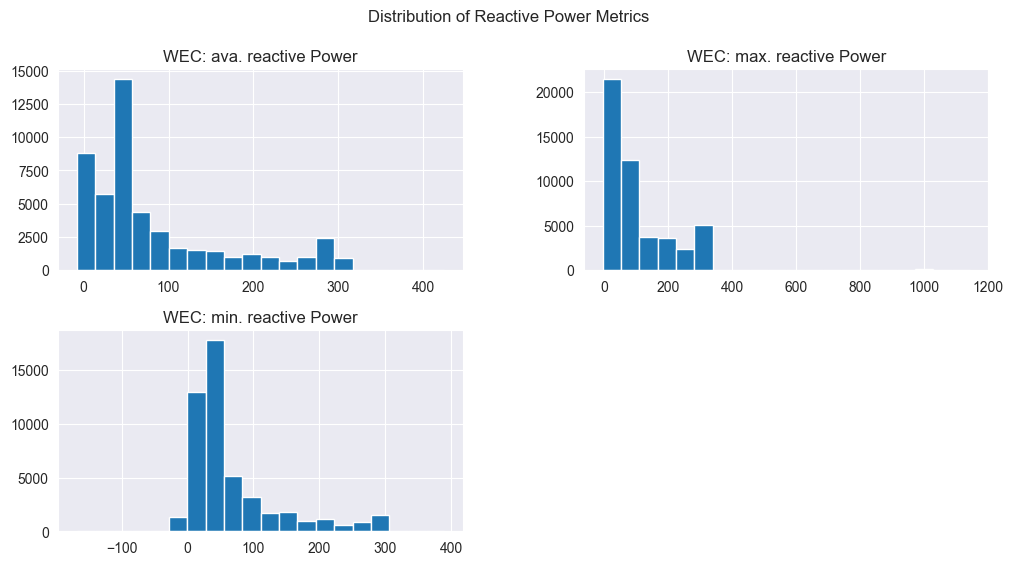

In [24]:
reactive_power_cols = ['WEC: ava. reactive Power', 'WEC: max. reactive Power', 'WEC: min. reactive Power']

# Histogram of reactive power metrics
df[reactive_power_cols].hist(bins=20, figsize=(12, 6))
plt.suptitle('Distribution of Reactive Power Metrics')
plt.show()

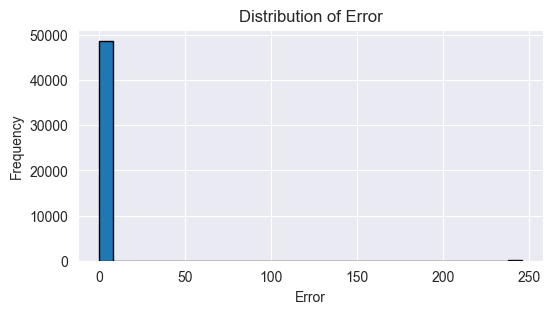

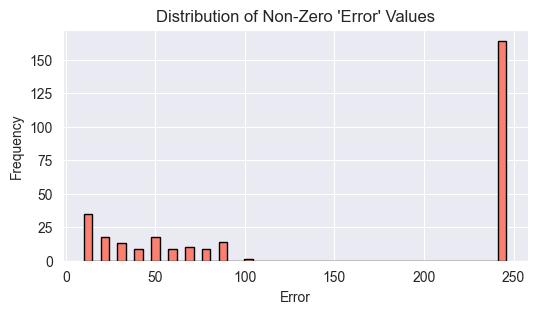

In [25]:
# Plot a histogram of the 'Error' column
plt.figure(figsize=(6, 3))
df['Error'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


# Filter out zeros
non_zero_errors = df[df['Error'] != 0]['Error']

# Plot distribution of non-zero Error values
plt.figure(figsize=(6, 3))
plt.hist(non_zero_errors, bins=50, color='salmon', edgecolor='black')
plt.title("Distribution of Non-Zero 'Error' Values")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

In [26]:
# checking for number of unique values in our potential Target Features
df[['Error', 'WEC: Operating Hours', 'WEC: Production kWh', 'WEC: Production minutes', 'WEC: ava. Power']].nunique()

Error                         12
WEC: Operating Hours        7005
WEC: Production kWh        41753
WEC: Production minutes       60
WEC: ava. Power             3067
dtype: int64

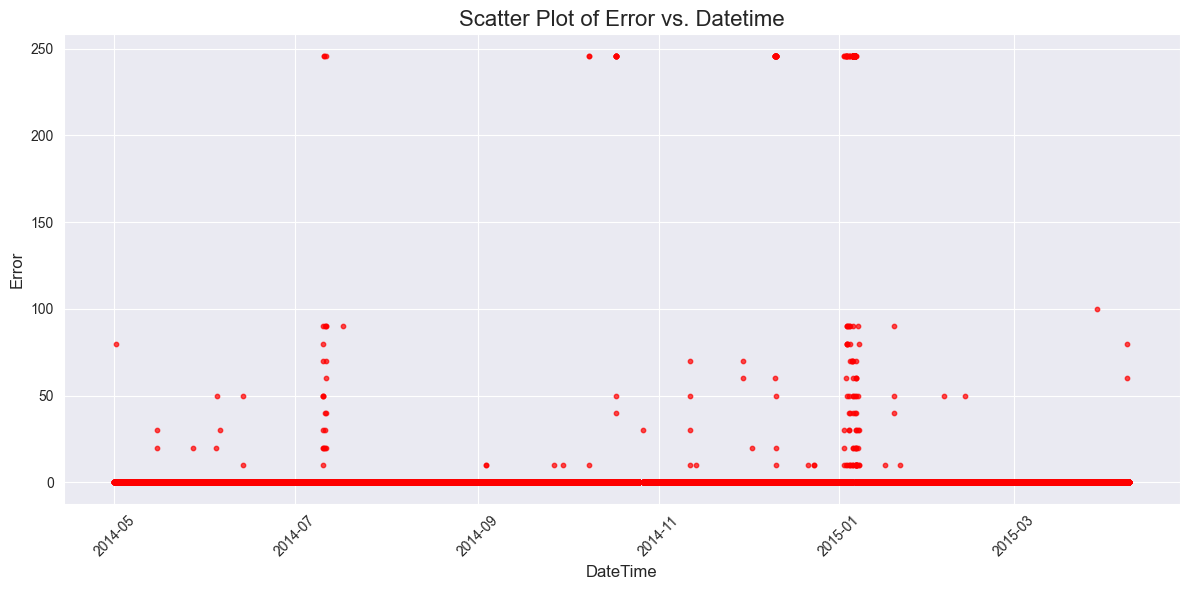

In [27]:


# Ensure the Datetime column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Create the scatter plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.scatter(df['DateTime'], df['Error'], alpha=0.7, color='red', s=10)  # Scatter plot with small markers

# Add labels and title
plt.title('Scatter Plot of Error vs. Datetime', fontsize=16)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('Error', fontsize=12)

# Rotate x-axis ticks for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


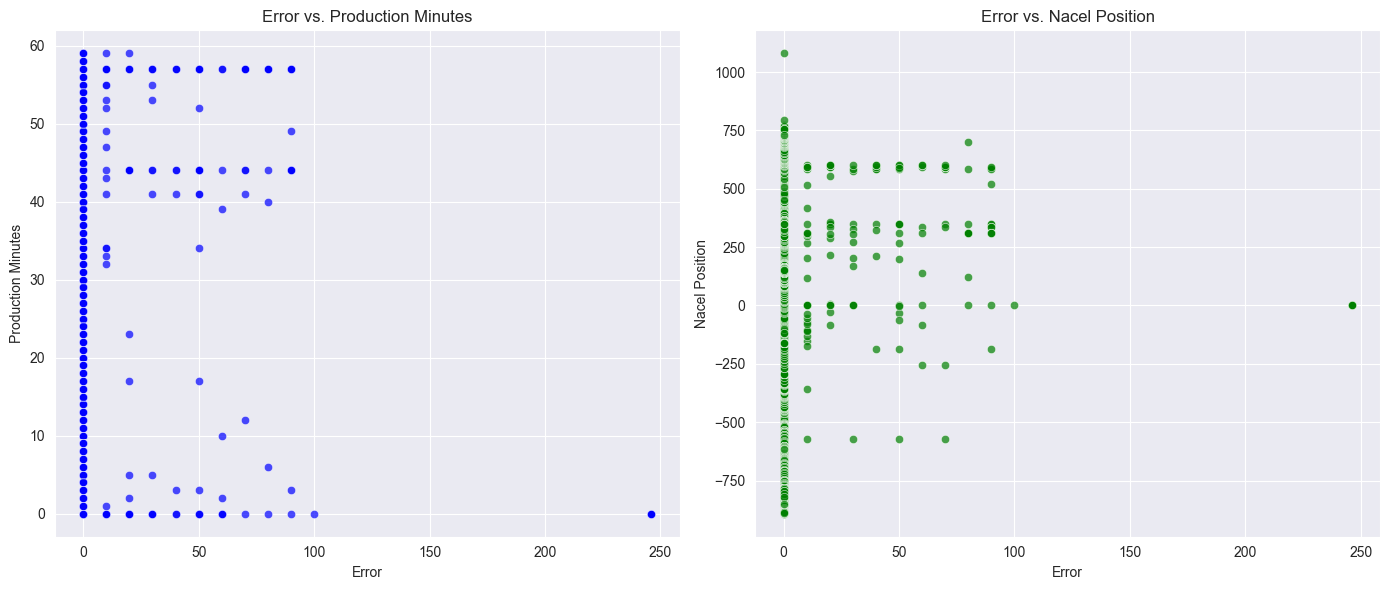

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (one for each feature vs. Error)
plt.figure(figsize=(14, 6))

# Subplot 1: Error vs. Production Minutes
plt.subplot(1, 2, 1)
plt.plot(data=df, x='Error', y='WEC: Production minutes', color='blue', alpha=0.7)
plt.title('Error vs. Production Minutes')
plt.xlabel('Error')
plt.ylabel('Production Minutes')

# Subplot 2: Error vs. Nacel Position
plt.subplot(1, 2, 2)
plt.plot(data=df, x='Error', y='WEC: ava. Nacel position including cable twisting', color='green', alpha=0.7)
plt.title('Error vs. Nacel Position')
plt.xlabel('Error')
plt.ylabel('Nacel Position')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [55]:
# Filter out columns containing 'min' or 'max'
filtered_columns = [col for col in df.columns if not ('min' in col.lower() or 'max' in col.lower())]

# Create a new DataFrame without these columns
df_filtered = df[filtered_columns]

# Display the remaining columns
print("Columns after filtering out 'min' and 'max':")
print(df_filtered.columns)
df_filtered.shape

Columns after filtering out 'min' and 'max':
Index(['DateTime', 'Time', 'Error', 'WEC: ava. windspeed',
       'WEC: ava. Rotation', 'WEC: ava. Power',
       'WEC: ava. Nacel position including cable twisting',
       'WEC: Operating Hours', 'WEC: Production kWh',
       'WEC: ava. reactive Power', 'WEC: ava. available P from wind',
       'WEC: ava. available P technical reasons',
       'WEC: ava. Available P force majeure reasons',
       'WEC: ava. Available P force external reasons',
       'WEC: ava. blade angle A', 'Sys 1 inverter 1 cabinet temp.',
       'Sys 1 inverter 2 cabinet temp.', 'Sys 1 inverter 3 cabinet temp.',
       'Sys 1 inverter 4 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.',
       'Sys 1 inverter 6 cabinet temp.', 'Sys 1 inverter 7 cabinet temp.',
       'Sys 2 inverter 1 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.',
       'Sys 2 inverter 3 cabinet temp.', 'Sys 2 inverter 4 cabinet temp.',
       'Sys 2 inverter 5 cabinet temp.', 'Sys 2 inverter 6 cab

(49027, 57)

# Feature Engineering

# Model Training and Selection